<a href="https://colab.research.google.com/github/DjordjeRadovanovic/PPPO_Projekat_IT39_2020/blob/main/PPPO_Projekat_IT39_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principi prezentacije i prepoznavanja oblika 2023/2024**


**Đorđe Radovanović IT39/2020**

**Tema:** Klasifikacija lišća

## **Sadržaj**

1. Uvod
2. Metodologija
3. Analiza dataseta
4. Odabir tehnologija
5. Učitavanje dataseta
6. Projekat
7. Zaključak
8. Literatura

## **1. Uvod**

Jedna od najznačajnijih primena mašinskog učenja je u domenu klasifikacije podataka. Klasifikacija podataka predstavlja određivanje kojoj klasi prosleđeni podatak pripada. Podaci mogu biti u numeričkom formatu ili u vidu slika.

Klasifikacija fotografija ima veliku korist u industriji i nauci. Naučnicima i inženjerima koji se bave analizom fotografija je od velike važnosti da ispravno utvrde klasu podataka koja se nalazi na fotografiji. Sa razvojem mašinskog učenja otvorena su vrata novim tehnikama analize i klasifikacije podataka.

Postoje dve metode klasifikacije fotografija. Prva metoda se svodi na uočavanje karakteristika fotografije, koje klasifikator kasnije upotrebljava da bi odredio klasu objekta na fotografiji, ili njegovu teksturu. Neke od tehnika su **klasifikacija pomoću HOG i linearne regresije**, ili **klasifikacija tekstura pomoću Gabor filtera**.

Druga metoda koristi već postojeće modele dubokog učenja, koji su već spremljeni i istrenirani na osnovu velikih setova podataka. Najčešće se koriste modeli poput **VGG16**, **VGG19**, **InceptionV3**, **ResNet**. Novi slučajevi upotrebe zahtevaju modifikaciju datih modela pomoću transfernog učenja (*transfer learning*).

Cilj ovog projekta je izrada modela koji omogućava klasifikaciju crno-belih fotografija oblika lista. Koristiće se **VGG16** model, jer je jednostavan i dovoljno performantan za ovaj slučaj upotrebe. Izvršiće se treniranje modela i njegova validacija, kako bi se utvrdilo da je model dovoljno precizan za dalju upotrebu. Na kraju, kao primer, biće izvršeno testiranje modela nad novim setom slika, kako bi se pokazala njegova preciznost u upotrebi.

## **2. Metodologija**

Pre početka izrade projekta, neophodno je definisati metodologiju kojom će se voditi projekat:

1.   **Analiza dataseta** - podatke je neophodno proučiti.
2.   **Odabir tehnologija** - potrebno je pronaći odgovarajuće tehnologije koje će se koristiti u projektu.
3.   **Učitavanje dataseta** - dataset se učitava u memoriju i disk.
4.   **Priprema podataka** - vrši se prilagođavanje podataka odabranim tehnologijama i modelu.
5.   **Kreiranje modela za klasifikaciju** - kreira se model za klasifikaciju fotografija lišća i analizira njegova preciznost.
6.   **Testiranje modela** - vrši se testiranje rada modela tako što se vrši predikcija sa novim podacima.

## **3. Analiza dataseta**

Koristiće se *Leaf_Classification.zip* fajl, koji je preuzet sa sledećeg linka:

https://drive.google.com/file/d/1r4yy2ZIUGoyESydQzY39L-0s8ld7fuXr/view?usp=sharing

*Leaf_Classification.zip* u sebi sadrži četiri posebna .zip fajla:

*   **images.zip** - sadrži 1584 crno-belih slika oblika lista
*   **sample_submission.csv.zip** - nije relevantan za projekat, koristi se za numeričku klasifikaciju na osnovu drugih kolona koje se ne koriste u ovom projektu.
*   **test.csv.zip** - CSV fajl sa 594 test fotografija listova, bez određenih klasa.
*   **train.csv.zip** - CSV fajl za treniranje i validaciju, sadrži 990 fotografija listova, gde svaki list ima svoju određenu klasu.

Ukupno ima 99 klasa/kategorija listova.


## **4. Odabir tehnologija**

Koristiće se metoda klasifikacije podataka koja koristi već postojeće modele, poput **VGG16**, **VGG19**, **InceptionV3**, **ResNet**, itd.

Za potrebe projekta koristiće se **VGG16** arhitektura, koja će se putem transfernog učenja i finog podešavanaja izmeniti kako bi odgovarala datom setu podataka. Iako nije toliko precizan poput nekih drugih modela, **VGG16** je odabran zbog toga što ima mali broj slojeva i dobru brzinu, što je potrebno za ovaj projekat.

**VGG16** se može naći u **Keras** API-ju, koji pored modela sadrži i ostale neophodne komponente, kao što su inicijalizator modela (omogućava nam izradu sopstvenih modela), slojevi (poput **Dense**, **Flatten** i dr.), optimizatori (u slučaju projekta koristiće se **Adam**).

Za proveru gubitaka koristiće se **sparse_categorical_crossentropy**, koji je namenjen za proveru gubitaka prilikom treniranja modela koji vrši klasifikaciju putem numeričkih labela/kategorija.

## **5. Učitavanje dataseta**

Prvi korak je učitavanje seta podataka koji će se koristiti prilikom treniranja modela. Da bi se to uradilo, neophodno je skinuti .zip fajl koji sadrži sve potrebne podatke, pomoću **wget** komande.

In [1]:
!wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1r4yy2ZIUGoyESydQzY39L-0s8ld7fuXr&confirm=xxx' -O Leaf_Classification.zip

--2024-06-16 22:37:57--  https://drive.usercontent.google.com/download?id=1r4yy2ZIUGoyESydQzY39L-0s8ld7fuXr&confirm=xxx
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.170.132, 2404:6800:4003:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.170.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35953027 (34M) [application/octet-stream]
Saving to: ‘Leaf_Classification.zip’

Leaf_Classification 100%[===================>]  34.29M  32.8MB/s    in 1.0s    

2024-06-16 22:37:59 (32.8 MB/s) - ‘Leaf_Classification.zip’ saved [35953027/35953027]



Kada je *Leaf_Classification.zip* fajl skinut, potrebno je izvršiti dekompresiju podataka. To se radi pomoću **unzip** komande.

In [2]:
!unzip Leaf_Classification.zip

Archive:  Leaf_Classification.zip
  inflating: images.zip              
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: train.csv.zip           


U *Leaf_Classification.zip* fajlu se nalaze još 4 posebna .zip fajla: *images.zip*, *sample_submission.csv.zip*, *train.csv.zip* i *test.csv.zip*. Analizom sadržaja ovih fajlova utvrđeno je da neće trebati *sample_submission.csv.zip*. Stoga, ponoviće se **unzip** komanda, ali samo za ostala tri .zip fajla.

In [3]:
!unzip -qq images.zip
!unzip -qq train.csv.zip
!unzip -qq test.csv.zip

Sada su svi podaci raspakovani i spremni za korišćenje u daljem radu. Sledeći korak je pisanje samog koda za pripremu podataka, generisanje, treniranje i testiranje modela.

## **6. Projekat**

Prva stvar koju je potrebno uraditi je importovanje svih neophodnih biblioteka za projekat. Potrebno je koristiti **pandas** biblioteku za Python, koja ima **DataFrame** dvodimenzionalnu strukturu podataka koju možemo koristiti za predstavljanje tabelarnih CSV podataka. Takođe je potrebno koristiti **NumPy** biblioteku za matematičke operacije nad prosleđenim podacima.

VGG16 model se preuzima iz **Keras** biblioteke, koja se koristi u svrhe mašinskog učenja. **Keras** biblioteka sadrži veliki broj modela, uključujuči i **VGG16**, koji će se koristiti.

**LabelEncoder** iz biblioteke **sklearn** će se koristiti za pretvaranje naziva klasa iz stringa u numeričke vrednosti.

In [4]:
# Importovanje neophodnih biblioteka
import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
import os
from PIL import Image
import matplotlib.pyplot as plt

### **6.1. Priprema podataka**

Sledeći korak je učitavanje i sređivanje CSV podataka iz *train.csv* fajla. Učitavanje se vrši pomoću **read_csv** funkcije iz **pandas** paketa. Podaci se unose u *train_df* DataFrame.

Takođe se vrši definisanje direktorijuma u kojem se nalaze slike neophodne za treniranje/testiranje modela.

In [5]:
# Učitavanje podataka iz train.csv u train_df DataFrame
train_df = pd.read_csv('train.csv')

# Definisanje direktorijuma sa slikama
img_dir = 'images/'

Potrebno je učitati slike iz direktorijuma i ubaciti ij u NumPy niz. Definisana je funkcija **load_and_preprocess_image** koja uzima putanju slika, vrši promenu dimenzija u 224x224 (kako bi bile pogodne za **VGG16** model), i vraća NumPy niz koji će se kasnije upotrebiti.

In [6]:
# Učitavanje i predprocesiranje slika
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img_array = np.asarray(img)
    img_array = img_array / 255.0
    return img_array

Sledeći korak je kreiranje listi *x_train* i *y_train*, koje će se koristiti za treniranje modela.

* **x_train** - slike lišća
* **y_train** - klase lišća, odgovaraju slici iz *x_train*

**Postupak:** Kreiraju se dve liste, i za svaki red u *train_df* se čitaju podaci. Podatak o ID-ju se pretvara u putanju slike, koja se učitava preko gorenavedene funkcije i ubacuje u *x_train*, dok se za vrednost *y_train* uzima naziv klase lista (**species**) koji stoji pored.

In [7]:
# Kreiranje listi sa podacima za treniranje modela
x_train = []
y_train = []

# Popunjavanje x_train i y_train listi
for index, row in train_df.iterrows():
    id = row['id']
    species = row['species']
    img_path = os.path.join(img_dir, f'{id}.jpg')

    # Učitavanje i sređivanje slike
    img = load_and_preprocess_image(img_path)

    # Dodavanje slike u x_train listu
    x_train.append(img)

    # Dodavanje klase u y_train listu
    y_train.append(species)

Sada kada su kreirani *x_train* i *y_train* podaci za treniranje, neophodno je proveriti da li su odgovarajućeg oblika za model.

In [8]:
# Provera x_train i y_train
print('x_train[0] shape:', x_train[0].shape)
print('y_train[0]:', y_train[0])

x_train[0] shape: (224, 224)
y_train[0]: Acer_Opalus


Kako podaci za *x_train* nisu odgovarajućeg oblika, neophodno je izvršiti konverziju. Potrebno je pretvoriti podatke u **NumPy** niz, i dodati četvrtu dimenziju - color channels. Kako RGB ima tri kanala, dodaje se broj 3.

In [9]:
x_new = []
for image in x_train:
    img_array = np.asarray(image)
    x_new.append(img_array)
x_train = np.array(x_new)

# Konverzija x_train u odgovarajući oblik - iz (990, 224, 224) u (990, 224, 224, 3)
x_train = np.repeat(x_train[..., np.newaxis], 3, axis=-1)

Podaci iz *y_train* se moraju pretvoriti u numeričke vrednosti kako bi se moglo izvršiti treniranje modela. Ta konverzija se vrši pomoću **LabelEncoder** funkcije iz biblioteke **sklearn**.

**LabelEncoder** dodeljuje numeričku vrednost svakom nazivu klase, po abecednom redu.

U ovom koraku takođe se vrši sortiranje naziva klasa po abecedi, kako bi se kasnije moglo vršiti mapiranje broja klase sa najvećom verovatnoćom sa nazivom klase.

In [10]:
# Transformacija labela u numeričke vrednosti, za output
classes_names = sorted(set(y_train)) # Da bismo sačuvali nazive klasa
y_train = LabelEncoder().fit_transform(y_train)
y_train = np.array(y_train)

Još jednom se vrši provera oblika input i output podataka za model.

In [11]:
# Prikaz oblika x_train i y_train
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (990, 224, 224, 3)
y_train shape: (990,)


Kada su podaci odgovarajućeg oblika, može se početi sa izgradnjom i treniranjem modela.

### **6.2. Kreiranje modela za klasifikaciju**

Prvo je potrebno definisati ukupan broj mogućih klasa. U slučaju predikcije listova, ima ih 99.

In [12]:
# Dobijanje ukupnog broja klasa
num_classes = train_df['species'].unique().size
print('Broj klasa: ', num_classes)

Broj klasa:  99


Koristiće se tehnika transfernog učenja (*transfer learning*).

**Ideja:** Koristi se postojeći model koji je već treniran za neki dataset. Takav model već ima razvijene tehnike uočavanja karakteristika koje se ne bi mogle razviti sa vrlo malim datasetom (kakav je ovaj). Postojeći model možemo prilagoditi novom setu podataka pomoću dodavanja slojeva, promene konfiguracije i ponovnog treniranja određenog broja slojeva sa novim datasetom.

U ovom slučaju koristiće se **VGG16** model kao osnova, jer sadrži dovoljan broj slojeva i dovoljno dobre performanse za ovaj slučaj analize.

Vrši se učitavanje baznog **VGG16** modela, konfiguracija njegovih slojeva. U ovom slučaju, potrebno je onemogućiti treniranje nekih slojeva tog modela.

*(Eksperimentisanjem je utvrđeno da je najbolje ostaviti poslednja dva modela otvorenim za treniranje, a svim drugim modelima zabraniti.)*

In [32]:
# Konfiguracija VGG16
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Onemogućavanje treniranja slojeva VGG16 modela
for layer in vgg_conv.layers[:-2]:
    layer.trainable = False

for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x783c34735b40> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783cd6556470> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783c804023e0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x783c80163520> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783c804bdc60> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783c801613f0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x783c347b50c0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783c801609a0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783c347b60e0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783c347363e0> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x783c347b74c0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x783c347b6020> False
<keras.src.layers.convolutional.conv2d.Conv2D ob

Sledeći korak je kreiranje modela. Koristi se sekvencijalni (*Sequential*) model, kome se dodaju slojevi. Kao početni sloj stavljaju se slojevi prethodno konfigurisanog **VGG16** modela.

Pored njega, dodaju se još četiri sloja.

*(Eksperimentisanjem je utvrđeno da ova četiri sloja, sa datim konfiguracijama, daju najbolje rezultate.)*

In [33]:
# Kreiranje modela - sekvencijalni
model = keras.Sequential()

# Dodavanje VGG16 slojeva u model
model.add(vgg_conv)

# Dodavanje novih slojeva u model
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Prikazivanje podataka o modelu koji je kreiran
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 99)                101475    
                                                                 
Total params: 40507299 (154.52 MB)
Trainable params: 28152419 (107.39 MB)
Non-trainable params: 12354880 (47.13 MB)
_________________________________________________________________


Sada sledi kompilacija modela. Koristi se **Adam** optimizator. Kao funkcija gubitka koristi se **sparse_categorical_crossentropy** koja je prilagođena za klasifikaciju numeričkih klasa.

Od metrika pratiće se **accuracy** - preciznost predikcije.

*(Eksperimentisanjem je utvrđeno da se najbolji rezultati dobijaju kada je stepen učenja (learning rate) **Adam** optimizatora podešen na 0.001 - standardnu vrednost.)*

In [34]:
# Kompilacija modela
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Sledi korak treniranja modela. Prosleđuju se već pripremljeni *x_train* i *y_train* setovi, broj epoha, veličina prosleđenih podataka i drugi parametri.

Eksperimentisanjem sa različitim vrednostima (10/15/30 *epochs*, 16/32/64 *batch_size*) je uočeno da je najbolji odnos brzine treniranja i tačnosti podataka kada se treniranje vrši u 15 epoha, sa *batch_size=32*.

Pomoću *validation_split=0.2*, vrši se "odsecanje" podataka na dva dela, u odnosu 80:20 (80% se koriste za treniranje, dok se ostalih 20% koristi za validaciju - proveru tačnosti modela).

In [35]:
# Treniranje modela
history = model.fit(x_train, y_train, epochs=15, validation_split=0.2, batch_size=32)

Epoch 1/15
25/25 [==============================] - 6s 208ms/step - loss: 4.5478 - accuracy: 0.1338 - val_loss: 2.5610 - val_accuracy: 0.3990
Epoch 2/15
25/25 [==============================] - 4s 165ms/step - loss: 1.6561 - accuracy: 0.5783 - val_loss: 0.9947 - val_accuracy: 0.6970
Epoch 3/15
25/25 [==============================] - 4s 167ms/step - loss: 0.6397 - accuracy: 0.7992 - val_loss: 0.7095 - val_accuracy: 0.7879
Epoch 4/15
25/25 [==============================] - 5s 187ms/step - loss: 0.3302 - accuracy: 0.8977 - val_loss: 0.6031 - val_accuracy: 0.7980
Epoch 5/15
25/25 [==============================] - 5s 189ms/step - loss: 0.3105 - accuracy: 0.9268 - val_loss: 0.5667 - val_accuracy: 0.8232
Epoch 6/15
25/25 [==============================] - 4s 169ms/step - loss: 0.2026 - accuracy: 0.9407 - val_loss: 0.5107 - val_accuracy: 0.8535
Epoch 7/15
25/25 [==============================] - 4s 169ms/step - loss: 0.1749 - accuracy: 0.9508 - val_loss: 0.6689 - val_accuracy: 0.8384
Epoch 

Uočeno je da je preciznost podataka prilikom treniranja oko 98-99%, a preciznost prilikom validacije oko 85-90%, što predstavlja visok stepen pouzdanosti modela.

Podaci dobijeni prilikom treniranja modela uneti su u promenljivu *history*. Ti podaci se mogu izvući i koristiti u graficima, poput:

* Grafika tačnosti treninga i validacije
* Grafika gubitka treninga i validacije

Crtanje grafika se vrši pomoću operacija iz biblioteke **matplotlib**.

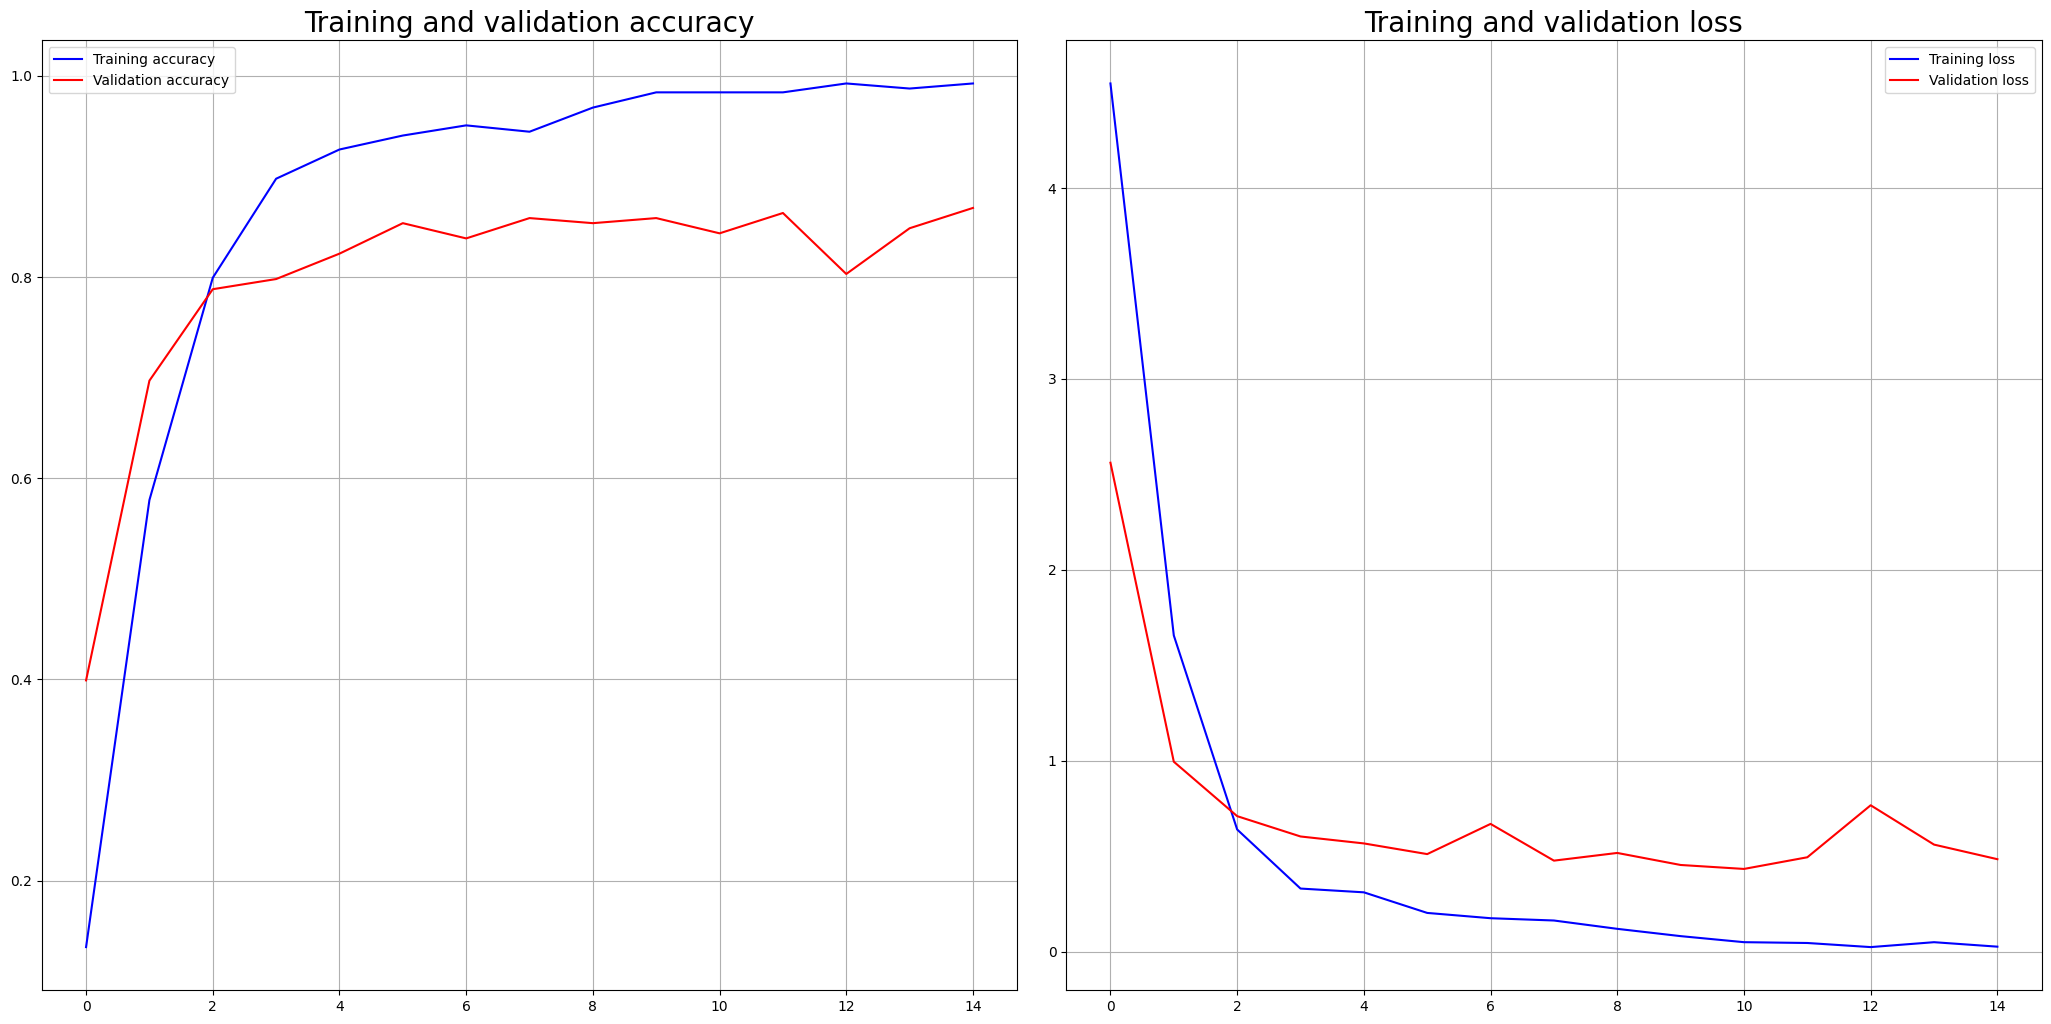

In [36]:
# Krive tačnosti i gubitaka
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Prikaz tačnosti treninga i validacije
# Prikaz gubitka treninga i validacije

plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.05, hspace=0)
plt.subplot(121)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy', size=20)
plt.legend(prop={'size': 10})
plt.grid()
plt.subplot(122)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.legend(prop={'size': 10})
plt.grid()
plt.show()

Model se može sačuvati u posebnom *.keras* fajlu, i može se kasnije upotrebljavati u službi klasifikacije lišća.

In [38]:
# Čuvanje modela
model.save('model.keras')

### **6.3. Testiranje modela**

Ostaje testirati model sa novim podacima. Potrebno je izvući nove podatke iz datoteke *test.csv* i ubaciti ih u *x_test*.

Postupak je gotovo identičan kao i za *x_train*.

In [39]:
# Učitavanje podataka iz test.csv u test_df DataFrame
test_df = pd.read_csv('test.csv')

# Kreiranje x_test podataka za predikciju
x_test = []

# Popunjavanje x_test liste
for index, row in test_df.iterrows():
    id = int(row['id'])                               # bugfix
    img_path = os.path.join(img_dir, f'{id}.jpg')
    img = load_and_preprocess_image(img_path)
    x_test.append(img)

x_new = []
for image in x_test:
    img_array = np.asarray(image)
    x_new.append(img_array)
x_test = np.array(x_new)

# Konverzija x_test u odgovarajući oblik - iz (594, 224, 224) u (594, 224, 224, 3)
x_test = np.repeat(x_test[..., np.newaxis], 3, axis=-1)

# Prikaz oblika x_test
print('x_test shape:', x_test.shape)

x_test shape: (594, 224, 224, 3)


Vrši se predikcija klasa novih slika, pomoću **model.predict**. Podaci dobijeni prilikom predikcije ubacuju se u *y_test*.

In [40]:
# Klasifikacija novih slika
y_test = model.predict(x_test)

19/19 [==============================] - 7s 375ms/step


Prikazan je jedan primer slike, i naziva klase dobijenog nakon upotrebe modela sa novim setom slika.

[9.81828634e-07 1.29611499e-06 1.90639895e-07 1.01674654e-04
 1.92243235e-07 1.65716347e-08 2.77813160e-06 1.24164662e-05
 2.30602363e-05 5.80832449e-08 2.08668985e-06 5.05554340e-07
 1.34896736e-05 1.12264601e-07 1.84497626e-08 8.39247605e-09
 3.39172850e-08 2.70886716e-07 9.19265020e-08 2.46814000e-08
 8.25399837e-09 7.89479415e-08 3.79612031e-09 1.33692724e-09
 4.90775207e-08 1.67589917e-07 2.32410198e-08 7.23899305e-08
 7.26188105e-08 9.62674349e-08 4.57121132e-07 7.13403324e-06
 1.83239067e-07 6.11328869e-05 1.49972621e-08 3.59592207e-07
 3.18406393e-07 2.11372289e-08 1.83725490e-07 1.33638984e-08
 1.46600962e-06 2.90301585e-07 6.73271217e-08 6.71204759e-07
 2.48145113e-08 3.41122650e-05 1.99672522e-05 1.05969747e-07
 2.62579825e-08 3.90585200e-08 1.31573952e-05 9.99115169e-01
 6.22282369e-06 6.87458794e-07 2.13831049e-06 1.34061781e-06
 4.75747555e-07 9.14314224e-09 1.94887662e-06 5.16910603e-08
 5.39743132e-06 1.20333095e-06 6.57858800e-06 4.37217182e-07
 2.16801072e-06 5.973229

(-0.5, 223.5, 223.5, -0.5)

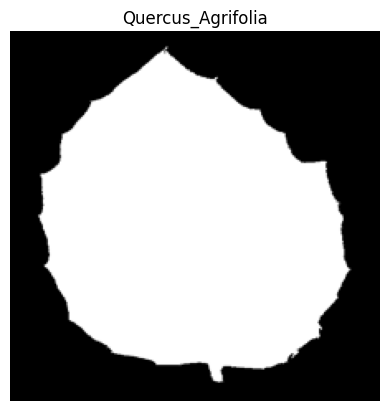

In [41]:
# Verovatnoće klasa za prvu test sliku
print(y_test[0])

# Prva test slika
plt.imshow(x_test[0])
plt.title(classes_names[np.argmax(y_test[0])])
plt.axis('off')

Ovako kreiran model se može koristiti za klasifikaciju crno-belih slika lišća u 99 kategorija, sa preciznošću od oko 85-90%.

## **7. Zaključak**

Napravljen je model za klasifikaciju crno-belih fotografija lišća, koji kao osnovu sadrži slojeve koji su deo **VGG16** modela. Izdvojeni su i prerađeni podaci, koji su upotrebljeni za treniranje i validaciju modela. Analizirana je preciznost modela i testiran je njegov rad sa novim podacima.

Ovakav model se kasnije može dodatno doraditi i trenirati sa novim i augmentovanim podacima, kako bi se postigla još veća preciznost i robusnost modela, neophodna za upotrebu u realnim slučajevima klasifikacije lišća.

## **8. Literatura**

[Vežbanke iz predmeta Principi prezentacije i prepoznavanja oblika](https://github.com/MarkoArsenovic/PPPO2021/blob/main/Vezbe08.ipynb)

[Beginner’s Guide to VGG16 Implementation in Keras](https://builtin.com/machine-learning/vgg16)

[Why Keras Is the Leading Deep Learning API](https://builtin.com/artificial-intelligence/why-keras-leading-deep-learning-api)

[Keras API Documentation](https://keras.io/api/)